In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


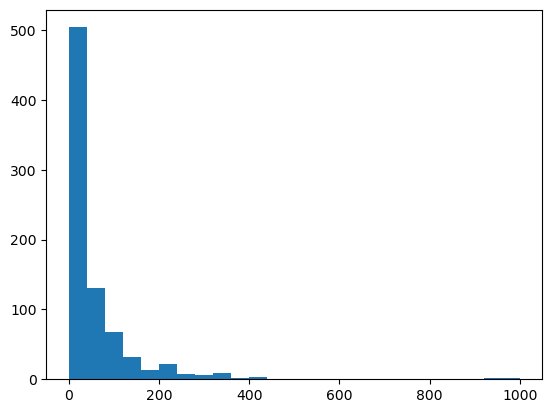

In [4]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

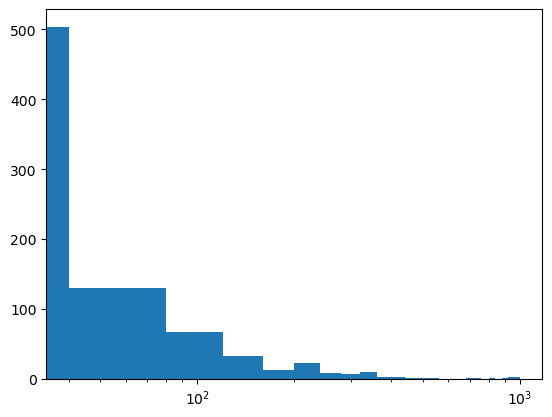

In [7]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log'); # to set which scale transformation to use
# odd looking plot with bar height same but the width wide of left and thin on right
# to add more interpretable values we need to change the bin values

In [12]:
np.log10(pokemon['weight'].describe()) # logarithmic values of description

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

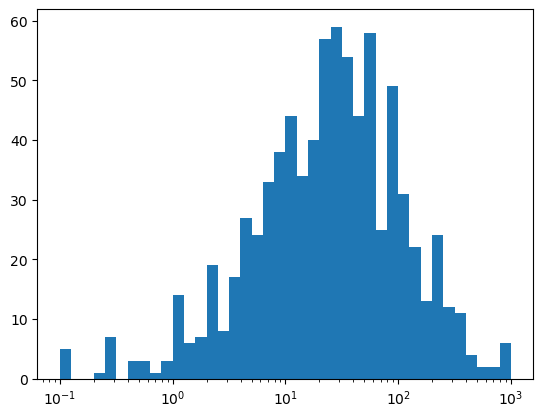

In [14]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)# min and max values taken from above logartihmic values of description
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

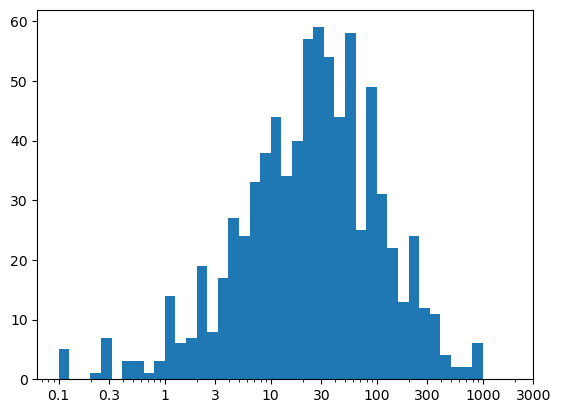

In [17]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
labels = [f'{v}' for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

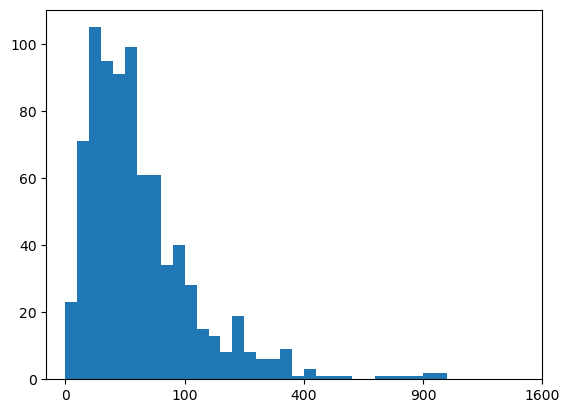

In [19]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    

bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1);
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges);
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10);
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));